In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('E:/ETG\\summer.csv')

In [4]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
## how many cities there ?
len(data['City'].unique())

22

Top 5 Sports having most number of Gold Medals are: 

         Sport  Gold Medals
0     Aquatics         1421
1    Athletics         1215
17      Rowing          890
4   Gymnastics          820
3      Fencing          552


AxesSubplot(0.125,0.125;0.775x0.755)


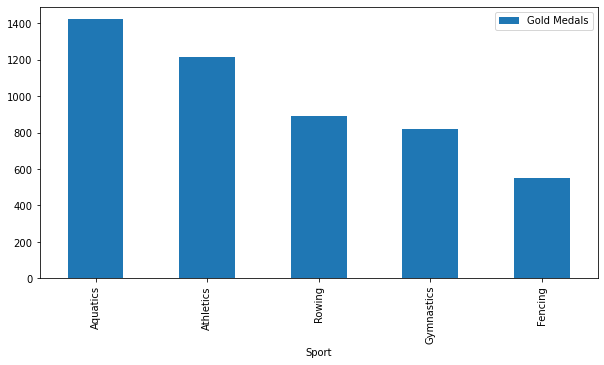

In [7]:
## which game having most number of gold madels
gold_medals=data[data['Medal']=='Gold']
gold_games=[]
for sport in gold_medals['Sport'].unique():
    gold_games.append([sport,len(gold_medals[gold_medals['Sport']==sport])])
    
df1 = pd.DataFrame(gold_games,columns = ["Sport","Gold Medals"])

print("Top 5 Sports having most number of Gold Medals are: \n")
print(df1.sort_values(by = 'Gold Medals', ascending = False).head())
print("\n")
print(df1.sort_values(by = 'Gold Medals', ascending = False).head().plot(x='Sport',y='Gold Medals',kind='bar',figsize=(10,5)))

In [63]:
## Which sport have most number of medals
medals=data.groupby(['Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)
Top_medal=medals.head()

<AxesSubplot:xlabel='Sport'>

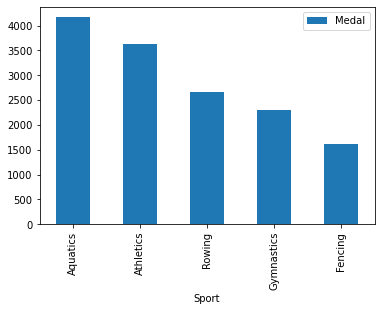

In [64]:
Top_medal.plot(x='Sport', y='Medal', kind='bar')

In [60]:
## player has won most number of medals
Top_athlete=data.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
Top_athlete.head()

,Athlete,Medal,Sport
18383,"PHELPS, Michael",Gold,18
13465,"LEWIS, Carl",Gold,9
17060,"NURMI, Paavo",Gold,9
22145,"SPITZ, Mark",Gold,9
13061,"LATYNINA, Larisa",Gold,9


In [66]:
## Player has won most number of gold medals
Top_gold_athletre=gold_medals.groupby(['Sport'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)
Top_gold_athletre.head()

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


Top 5 Athletes having most number of Gold Medals are: 

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


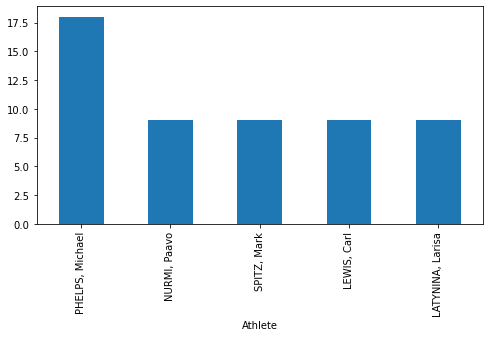

In [9]:
print("Top 5 Athletes having most number of Gold Medals are: \n")
print(gold_medals.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head())
print("\n")
print(gold_medals.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head().plot(kind='bar',figsize=(8,4)))

In [12]:
## which year india has won first gold medal
gold_yr = gold_medals[gold_medals['Country'] == 'IND'].sort_values(by = 'Year').head(1)['Year'].item()
print(f"India won it's first Gold Medal in Summer Olympics in the year {gold_yr}.")
        

India won it's first Gold Medal in Summer Olympics in the year 1928.


In [156]:
## which sport havce most female gold-medalist
female_gold=data[data['Gender']=='Women'].sort_values(by='Year', ascending=True)
female_gold=female_gold[female_gold['Medal']=='Gold']
female_gold




,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
731,1904,St Louis,Archery,Archery,"POLLOCK, Jessie",USA,Women,Teams Fita Round,Gold
733,1904,St Louis,Archery,Archery,"WOODRUFF, Laura",USA,Women,Teams Fita Round,Gold
...,...,...,...,...,...,...,...,...,...
29835,2012,London,Basketball,Basketball,"CATCHINGS, Tamika",USA,Women,Basketball,Gold
29836,2012,London,Basketball,Basketball,"CHARLES, Tina",USA,Women,Basketball,Gold
29837,2012,London,Basketball,Basketball,"FOWLES, Sylvia",USA,Women,Basketball,Gold
29838,2012,London,Basketball,Basketball,"JONES, Asjha",USA,Women,Basketball,Gold


<AxesSubplot:xlabel='sport'>

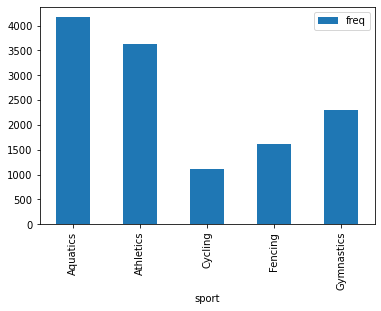

In [154]:
## which event is most popular in terms of number of players 
pop_event =[]
for sport in data['Sport'].unique():
    pop_event.append([sport, len(data[data['Sport']==sport])])

pop_event=pd.DataFrame(pop_event, columns=['sport', 'freq'])
pop_event=pop_event.head(5)
pop_event.plot(x='sport', y='freq', kind='bar')